In [7]:
import nltk
import pandas as pd
import numpy as np
import codecs
import PyPDF2
import copy
import pickle

In [2]:
pdfFileObject = open('All_MOUs.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
count = pdfReader.numPages
myPdf_raw = dict()
for i in range(16, count):
    page = pdfReader.getPage(i)
    myPdf_raw[i] = page.extractText()

In [4]:
myPdf_copy = copy.deepcopy(myPdf_raw)
print(len(myPdf_copy)) #the ouput is 7398 instead of 7414 because the 16 pages don't have any text (7414-16=7398)

7398


In [5]:
for key in myPdf_copy:
    myPdf_copy[key] = ' '.join(myPdf_copy[key].split()).lower()

In [6]:
myData = pd.DataFrame.from_dict(myPdf_copy, orient='index')
myData.columns= ['content']
myData['compensation'] = 0
myData.head()
myData.tail()

,content,compensation
7409,city of los angeles class code/title and mou n...,0
7410,city of los angeles class code/title and mou n...,0
7411,city of los angeles general manager salary ran...,0
7412,city of los angeles general manager salary ran...,0
7413,city of los angeles general manager salary ran...,0


In [7]:
myData.loc[myData.index[47:58], ['compensation']] = 1
myData.loc[myData.index[175:188], ['compensation']] = 1
myData.loc[myData.index[271:280], ['compensation']] = 1
myData.loc[myData.index[788:801], ['compensation']] = 1
myData.loc[myData.index[895:909], ['compensation']] = 1
myData.loc[myData.index[1067:1082], ['compensation']] = 1
myData.loc[myData.index[1150:1163], ['compensation']] = 1
myData.loc[myData.index[1213:1221], ['compensation']] = 1
myData.loc[myData.index[1287:1293], ['compensation']] = 1
myData.loc[myData.index[1422:1427], ['compensation']] = 1
myData.loc[myData.index[1480:1485], ['compensation']] = 1
myData.loc[myData.index[1620:1633], ['compensation']] = 1
myData.loc[myData.index[1708:1718], ['compensation']] = 1
myData.loc[myData.index[1808:1819], ['compensation']] = 1
myData.loc[myData.index[1885:1898], ['compensation']] = 1
myData.loc[myData.index[2406:2416], ['compensation']] = 1
myData.loc[myData.index[2495:2508], ['compensation']] = 1
myData.loc[myData.index[2661:2668], ['compensation']] = 1
myData.loc[myData.index[2426:2733], ['compensation']] = 1
myData.loc[myData.index[2842:2854], ['compensation']] = 1
myData.loc[myData.index[2933:2945], ['compensation']] = 1
myData.loc[myData.index[3089:3100], ['compensation']] = 1
myData.loc[myData.index[3172:3183], ['compensation']] = 1
myData.loc[myData.index[3288:3297], ['compensation']] = 1
myData.loc[myData.index[3359:3370], ['compensation']] = 1
myData.loc[myData.index[3501:3514], ['compensation']] = 1
myData.loc[myData.index[3582:3592], ['compensation']] = 1
myData.loc[myData.index[3676:3688], ['compensation']] = 1
myData.loc[myData.index[3762:3775], ['compensation']] = 1
myData.loc[myData.index[3908:3921], ['compensation']] = 1
myData.loc[myData.index[4014:4028], ['compensation']] = 1
myData.loc[myData.index[4111:4124], ['compensation']] = 1
myData.loc[myData.index[4248:4261], ['compensation']] = 1
myData.loc[myData.index[4351:4364], ['compensation']] = 1
myData.loc[myData.index[4494:4507], ['compensation']] = 1
myData.loc[myData.index[4532:4534], ['compensation']] = 1
myData.loc[myData.index[4897:4905], ['compensation']] = 1
myData.loc[myData.index[5055:5063], ['compensation']] = 1
myData.loc[myData.index[5218:5221], ['compensation']] = 1
myData.loc[myData.index[5271:5275], ['compensation']] = 1
myData.loc[myData.index[5457:5463], ['compensation']] = 1
myData.loc[myData.index[5504:5510], ['compensation']] = 1
myData.loc[myData.index[5578:5584], ['compensation']] = 1
myData.loc[myData.index[5613:5622], ['compensation']] = 1
myData.loc[myData.index[5832:5837], ['compensation']] = 1
myData.loc[myData.index[6161:6164], ['compensation']] = 1
myData.loc[myData.index[6216:6219], ['compensation']] = 1
myData.loc[myData.index[6826:6832], ['compensation']] = 1
myData.loc[myData.index[6902:6907], ['compensation']] = 1
myData.loc[myData.index[6975:6978], ['compensation']] = 1
myData.loc[myData.index[7015:7022], ['compensation']] = 1
myData.loc[myData.index[7101:7105], ['compensation']] = 1
myData.loc[myData.index[7144:7152], ['compensation']] = 1
myData.loc[myData.index[7196:7201], ['compensation']] = 1

In [53]:
myData.to_csv('LAData.csv', encoding='utf-8')
myData_clean = pd.read_csv('LAData.csv', index_col = 'pages', names = ['pages', 'content', 'compensation'], header=0)
myData_clean.head()
myData_clean.describe()
myData_clean['content'] = myData_clean['content'].astype(str)
myData_clean.dtypes

content         object
compensation     int64
dtype: object

In [59]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[A-Za-z]+|\$[\d\.]+|[\d\.]+\%')

myData_clean['tokens'] = myData_clean['content'].apply(tokenizer.tokenize)

myData_clean.head()

,content,compensation,tokens
pages,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, of, understanding, no, for, submi..."
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[i, mou, table, of, contents, page, general, p..."
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, of, contents, page, work, sch..."
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, of, contents, page, salary, ..."
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re..."


In [65]:
from ast import literal_eval

myData_clean.to_csv('LAData_tokens.csv', encoding='utf-8')
LAData_tokens = pd.read_csv('LAData_tokens.csv', index_col = 'pages', names = ['pages', 'content', 'compensation', 'tokens'], header=0)
LAData_tokens['tokens'] = LAData_tokens['tokens'].apply(literal_eval)
LAData_tokens.head()
#LAData_tokens.describe()
#LAData_tokens.dtypes

,content,compensation,tokens
pages,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, understanding, submission, city, ..."
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[i, mou, table, of, contents, page, general, p..."
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, of, contents, page, work, sch..."
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, of, contents, page, salary, ..."
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re..."


In [66]:
from nltk.corpus import stopwords

LAData_tokens['tokens'] = LAData_tokens['tokens'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
LAData_tokens.head()

In [5]:
LAData_tokens.to_csv('LAData_nosw.csv', encoding='utf-8')
LAData_nosw = pd.read_csv('LAData_nosw.csv', index_col = 'pages', names = ['pages', 'content', 'compensation', 'tokens'], header=0)
LAData_nosw['tokens'] = LAData_nosw['tokens'].apply(literal_eval)
LAData_nosw.head()
#LAData_nosw.describe()
#LAData_nosw.dtypes

,content,compensation,tokens
pages,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, understanding, submission, city, ..."
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[mou, table, contents, page, general, provisio..."
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, contents, page, work, schedul..."
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, contents, page, salary, note..."
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re..."


In [68]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

LAData_nosw['stemm'] = LAData_nosw['tokens'].apply(lambda x : [stemmer.stem(item) for item in x])
LAData_nosw.head()

,content,compensation,tokens,stemm
pages,,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, understanding, submission, city, ...","[memorandum, understand, submiss, citi, counci..."
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[mou, table, contents, page, general, provisio...","[mou, tabl, content, page, gener, provis, reco..."
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, contents, page, work, schedul...","[ii, mou, tabl, content, page, work, schedul, ..."
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, contents, page, salary, note...","[iii, mou, tabl, content, page, salari, note, ..."
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re...","[mou, articl, gener, provis, articl, recognit,..."


In [2]:
#LAData_nosw.to_csv('LAData_stemm.csv', encoding='utf-8')
LAData_stemm = pd.read_csv('LAData_stemm.csv', index_col = 'pages', names = ['pages', 'content', 'compensation', 'tokens', 'stemm'], header=0)
LAData_stemm['tokens'] = LAData_stemm['tokens'].apply(literal_eval)
LAData_stemm['stemm'] = LAData_stemm['stemm'].apply(literal_eval)
#LAData_stemm.head()
#LAData_stemm.describe()
#LAData_stemm.dtypes

In [3]:
all_words = [word for tokens in LAData_stemm['tokens'] for word in tokens]
vocab = sorted(set(all_words))
#print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocab)))
print("Tokens:", len(all_words))
print("Vocabulary:", len(vocab))

Tokens: 1265572
Vocabulary: 25780


In [4]:
stemm_words = [word for tokens in LAData_stemm['stemm'] for word in tokens]
freq_dist = nltk.FreqDist(stemm_words)
print(freq_dist.most_common(50))
freq_dist.plot(50)

[('employe', 38069), ('shall', 31803), ('time', 14685), ('citi', 12852), ('leav', 12843), ('manag', 12160), ('day', 11321), ('work', 10799), ('articl', 10750), ('mou', 10357), ('hour', 9328), ('may', 7898), ('period', 7676), ('servic', 7256), ('pay', 7207), ('step', 6846), ('depart', 6781), ('provid', 6767), ('grievanc', 6508), ('ii', 6428), ('salari', 6406), ('compens', 5954), ('bw', 5856), ('offic', 5610), ('union', 5601), ('receiv', 5596), ('provis', 5574), ('section', 5495), ('unit', 5292), ('b', 5148), ('assign', 4978), ('oper', 4796), ('supervisor', 4790), ('rate', 4777), ('within', 4758), ('c', 4639), ('request', 4596), ('one', 4591), ('date', 4571), ('follow', 4527), ('benefit', 4521), ('parti', 4490), ('member', 4453), ('requir', 4408), ('e', 4342), ('effect', 4297), ('use', 4266), ('year', 4125), ('schedul', 4102), ('class', 4027)]


<Figure size 640x480 with 1 Axes>

In [17]:
'''import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('pages')
plt.ylabel('compensation')
plt.hist(LAData_stemm.pages)
plt.show()'''

"import matplotlib.pyplot as plt\n\nfig = plt.figure(figsize=(10, 10)) \nplt.xlabel('pages')\nplt.ylabel('compensation')\nplt.hist(LAData_stemm.pages)\nplt.show()"

In [57]:
LAData_stemm['clean_content'] = LAData_stemm['stemm'].apply(lambda x: " ".join(word for word in x))
LAData_stemm.head()

,content,compensation,tokens,stemm,clean_content
pages,,,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, understanding, submission, city, ...","[memorandum, understand, submiss, citi, counci...",memorandum understand submiss citi council reg...
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[mou, table, contents, page, general, provisio...","[mou, tabl, content, page, gener, provis, reco...",mou tabl content page gener provis recognit pa...
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, contents, page, work, schedul...","[ii, mou, tabl, content, page, work, schedul, ...",ii mou tabl content page work schedul altern w...
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, contents, page, salary, note...","[iii, mou, tabl, content, page, salari, note, ...",iii mou tabl content page salari note letter a...
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re...","[mou, articl, gener, provis, articl, recognit,...",mou articl gener provis articl recognit manag ...


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = LAData_stemm['clean_content'].tolist() #I have to pass on 'content' column but I have to clean it before
list_labels = LAData_stemm['compensation'].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

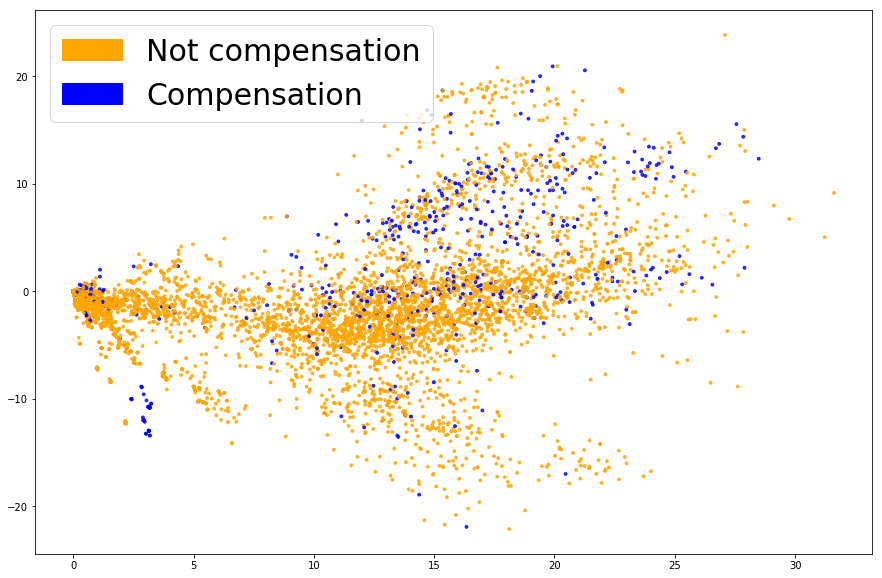

In [64]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Not compensation')
            green_patch = mpatches.Patch(color='blue', label='Compensation')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(15, 10))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [66]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.856, precision = 0.877, recall = 0.856, f1 = 0.865


In [67]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

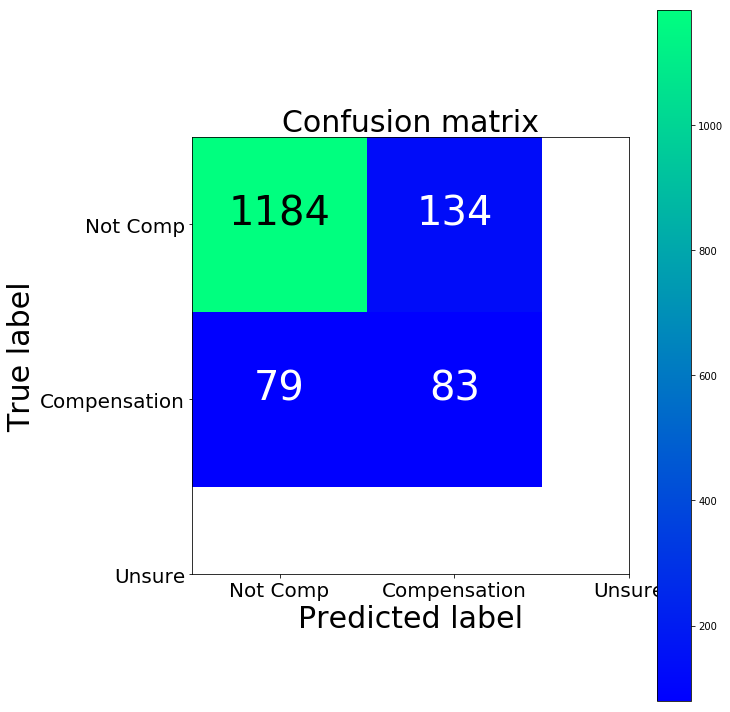

[[1184  134]
 [  79   83]]


In [70]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Not Comp','Compensation','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [71]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

In [72]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Not comp', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Compensation', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

KeyError: 1

In [73]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

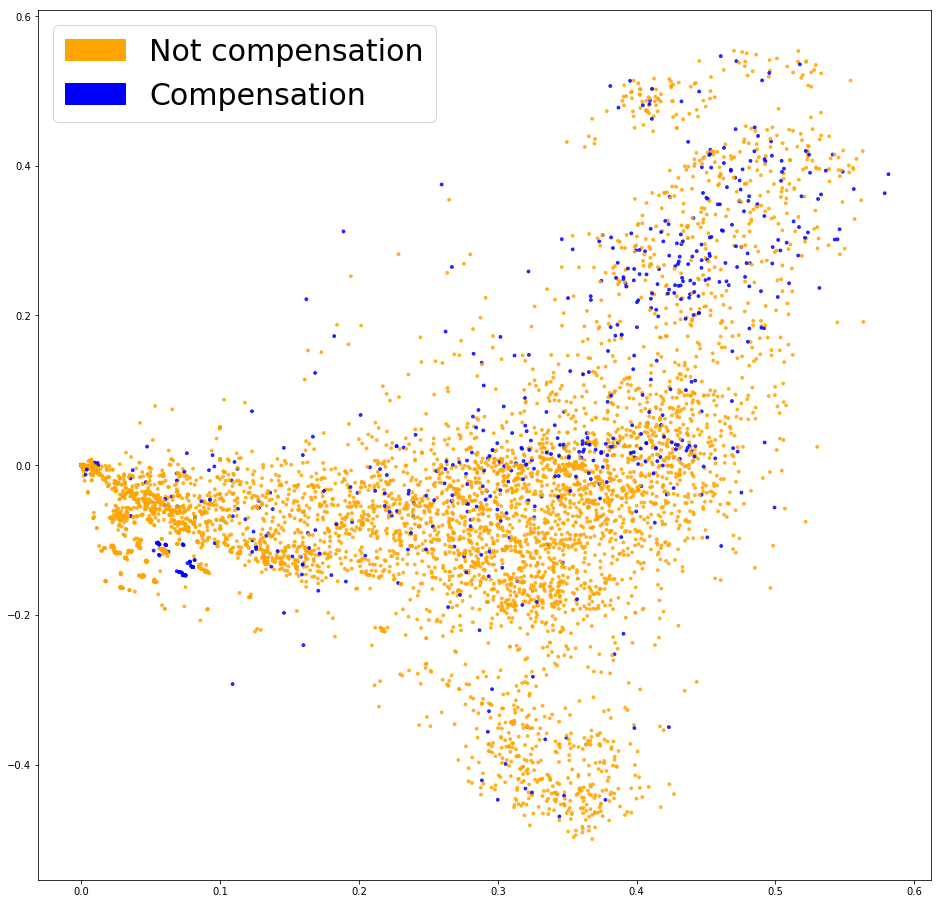

In [74]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [96]:
'''new_contract_first_page = list()
for key, value in myPdf_copy.items():
    if 'this memorandum of understanding made' in value:
        new_contract_first_page.append(key)'''  

'''print(len(new_contract_first_page))'''

'''print(new_contract_first_page)'''

'''new_contract_first_page.append(5469-1) #not added automatically due to junmple considered as space (un derstanding)
new_contract_first_page.append(5930-1) #not added automtically due to image input (not uncoded)
new_contract_first_page.append(6997-1) #not added automtically due to image input (not uncoded)
print(len(new_contract_first_page))'''

'''new_contract_first_page.sort()
print(new_contract_first_page)'''

'''myPdf_By_Contract = dict()
for i, element in enumerate(new_contract_first_page):
    if i < len(new_contract_first_page)-1:
        myPdf_By_Contract[i] = [myPdf_copy[x] for x in range(element, new_contract_first_page[i+1])]
myPdf_By_Contract[i] = [myPdf_copy[x] for x in (range(element, len(myPdf_copy)))]'''

'myPdf_By_Contract = dict()\nfor i, element in enumerate(new_contract_first_page):\n    if i < len(new_contract_first_page)-1:\n        myPdf_By_Contract[i] = [myPdf_copy[x] for x in range(element, new_contract_first_page[i+1])]\nmyPdf_By_Contract[i] = [myPdf_copy[x] for x in (range(element, len(myPdf_copy)))]'

In [200]:
'''from nltk import pos_tag
pos_tokens = list()
for index in range(len(tokens)):
    pos_tokens.append(nltk.pos_tag(tokens[index]))
pos_tokens[0][0]'''

'''from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return '' '''

'''poses = [pos[1] for pos in pos_tokens[0]]
poses = set(poses)
poses'''

'''from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatise = list()
for i in range(len(pos_tokens)):
    for j in range(i):
        lemmatise.append(lemmatizer.lemmatize(pos_tokens[i][j][0], get_wordnet_pos(pos_tokens[i][j][1])))'''

'from nltk.stem import WordNetLemmatizer\n\nlemmatizer = WordNetLemmatizer()\nlemmatise = list()\nfor i in range(len(pos_tokens)):\n    for j in range(i):\n        lemmatise.append(lemmatizer.lemmatize(pos_tokens[i][j][0], get_wordnet_pos(pos_tokens[i][j][1])))'